In [1]:
# load some libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from scipy.special import sph_harm
from scipy.special import erf
import uhf_routines as uhf

In [2]:
# set STO-3G basis for zeta = 1.24
alpha = np.array([0.168856,0.623913,3.42525])
d = np.array([0.444635,0.535328,0.154329])
R = np.empty((2,3),dtype=float)
R[0,0] = R[0,1] = R[0,2] = 0.0
R[1,0] = 1.4
R[1,1] = R[1,2] = 0.0
basis_set = [uhf.sto(3,alpha,d,R[i,:]) for i in range(2)]
atoms = [uhf.atom(R[i,:],1.0) for i in range(2)]

In [3]:
# setup scan
r = np.arange(0.5,15,0.1)
n = len(r)
energy = np.empty(n)
print n

145


In [7]:
for i in range(n):
    basis_set[1].R[0] = r[i]
    atoms[1].pos[0] = r[i]
    S, Sinv = uhf.overlap(basis_set)
    T = uhf.kinetic(basis_set)
    V = uhf.core_potential(basis_set,atoms)
    Hcore = V + T
    twoE = uhf.compute_twoE(basis_set)
    Ca,Cb, eta = uhf.C_u(S,Hcore,twoE)
    Pa = uhf.constructDensityMat(Ca)
    Pb = uhf.constructDensityMat(Cb)
    PT = Pa+Pb
    Ga = uhf.compute_G(PT,Pa,twoE)
    Gb = uhf.compute_G(PT,Pb,twoE)
    Fa = Hcore + Ga
    Fb = Hcore + Gb
    energy[i] = uhf.total_energy(Fa,Fb,Hcore,PT,Pa,Pb,atoms)

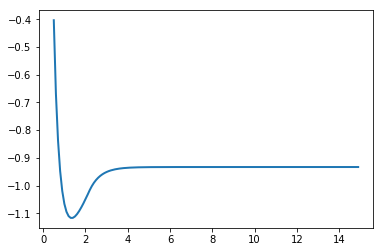

In [8]:
plt.plot(r,energy,lw=2)

In [13]:
np.savetxt("uhf_energy_scan.txt",np.column_stack((r,energy)))